### Text Classification Using Naive Bayes

The assignment involved the creation of a text classification model using the Naives Bayes algorithm. 
The main objective of the task was to create a model that predicted correctly the sentiment of a customer review 
as either positive or negative. 
After completion, the model was able to successfully predict with an accuracy of 82%.

In [1]:
#Importing Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn import naive_bayes
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### Reading Document

In [5]:
# Reading the data
def read_data(corpus_file, use_sentiment=True):
    X = []
    Y = []
    with open(corpus_file, encoding='utf-8') as f:
        for line in f:
            product, sentiment, _, doc = line.strip().split(maxsplit=3)
            X.append(doc)
            Y.append(sentiment if use_sentiment else product)
    return X, Y

In [6]:
X, Y = read_data('all_sentiment_shuffled1.txt', use_sentiment=True)

### Counting the positive and negative sentiments

In [7]:
# Counting positive or negative sentiments
idx = pd.Index(Y)
pos_neg_counts= idx.value_counts()
pos_neg_counts

pos    6000
neg    5914
dtype: int64

### Transforming the text data to a dataframe

In [84]:
#Changing the data to dataframe for easier understanding
z=pd.DataFrame(Y)
w=pd.DataFrame(X)

#Renaming the columns
z.rename({0: 'Sentiment'}, axis=1, inplace= True)
w.rename({0: 'Text'}, axis=1, inplace= True)

# Merge the data
df = pd.merge(w, z, left_index=True, how= 'outer', right_index=True)

df.head(5)


,Text,Sentiment
0,"(0, 42127)\t0.07533933722593666\n (0, 12222...",neg
1,"(0, 29520)\t0.1458356193781596\n (0, 9673)\...",neg
2,"(0, 12440)\t0.1000067947473819\n (0, 36382)...",neg
3,"(0, 31924)\t0.1518658630339014\n (0, 18531)...",pos
4,"(0, 8035)\t0.5038300388728117\n (0, 40709)\...",pos


In [32]:
#Describing that data
df.describe()

,Text,Sentiment
count,11914,11914
unique,11278,2
top,polarizing filters are used to eliminate glare...,pos
freq,5,6000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       11914 non-null  object
 1   Sentiment  11914 non-null  object
dtypes: object(2)
memory usage: 186.3+ KB


### Using a count plot to visualize the number of positive and negative sentiments

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

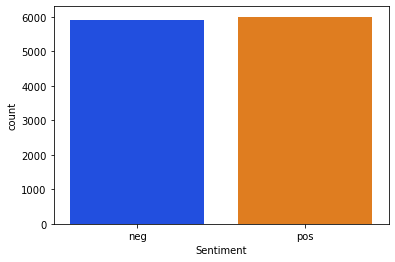

In [85]:
# Creating a count plot
sns.countplot(x="Sentiment", data=df, palette='bright')

### Changing the categorical data to numerical 

In [35]:
# Changing the categorical data to numerical
Sentiment = pd.get_dummies(df['Sentiment'], drop_first=True)
Sentiment.rename({'pos': 'Sentiment'}, axis=1, inplace= True)
Sentiment.head()

,Sentiment
0,0
1,0
2,0
3,1
4,1


In [38]:
# Removing the categorical Sentiment column
df.drop('Sentiment', axis=1, inplace=True)

In [39]:
# Joining the new created Sentiment column with table
df = pd.concat([df, Sentiment], axis=1)

In [40]:
df.head()

,Text,Sentiment
0,i bought this album because i loved the title ...,0
1,i was misled and thought i was buying the enti...,0
2,"i have introduced many of my ell , high school...",0
3,anything you purchase in the left behind serie...,1
4,"i loved these movies , and i cant wiat for the...",1


### Eliminating unnecessary words and matching unique names

In [41]:
# Eliminating commonly used words and finding frequencies and matching unique names
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, 
                            strip_accents='ascii', stop_words=stopset)

In [44]:
# Establishing dependent(y) and independent(X) variables
X= vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [51]:
print (X.shape)
print (y.shape)

(11914, 47135)
(11914,)


### Training and Testing the Model

In [68]:
# Splitting it into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=1)

In [69]:
# Training the model
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [70]:
# Predicting the model
y_predicted = model.predict(X_test)

### Classification Report

In [72]:
#Observing classification report
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1163
           1       0.84      0.81      0.83      1220

    accuracy                           0.82      2383
   macro avg       0.82      0.82      0.82      2383
weighted avg       0.83      0.82      0.82      2383



### Cross validation

In [67]:
#Using cross validation to check the accuracy of the model 
from sklearn.model_selection import cross_validate
model_accuracy_scores = cross_validate(model, X, y, cv=5)
model_accuracy_score= pd.DataFrame(model_accuracy_scores)
model_accuracy_score

,fit_time,score_time,test_score
0,0.025033,0.0,0.822912
1,0.032006,0.0,0.830885
2,0.024677,0.0,0.825010
3,0.024697,0.0,0.825850
4,0.023772,0.0,0.824937


## The End